<a href="https://colab.research.google.com/github/Miranita-ar/MANOVA_Statistika-Multivariat/blob/main/Remedial_Statmul_MANOVA_055_Miranita_Anisa_Rohmah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 12.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.multivariate.manova import MANOVA

#MANOVA

Sebuah universitas ingin meneliti apakah tempat tinggal mempengaruhi durasi belajar per hari dan nilai IPK Mahasiswa mereka. Untuk keperluan ini, universitas melakukan simulasi data terhadap 45 mahasiswa yang dibagi menjadi 3 kelompok berdasarkan tempat tinggal, yaitu :
1. tinggal bersama orang tua (ditulis : orang tua)
2. kost
3. tinggal di rumah saudara. (ditulis : rumah saudara)

Selanjutnya, Universitas membandingkan lama belajar mahasiswa per hari (jam) dan nilai IPK dari ke-3 kelompok.

In [ ]:
data_manova = pd.read_excel("/content/data mahasiswa.xlsx")
data_manova

,tempat tinggal,lama belajar per hari (jam),IPK
0,orang tua,3,3.85
1,orang tua,4,3.90
2,orang tua,2,3.70
3,orang tua,3,3.80
4,orang tua,4,3.92
5,orang tua,2,3.65
6,orang tua,3,3.75
7,orang tua,4,3.95
8,orang tua,3,3.88
9,orang tua,2,3.78


In [ ]:
data_orang_tua = data_manova[data_manova['tempat tinggal'] == 'orang tua'][['lama belajar per hari (jam)', 'IPK']]
data_kost = data_manova[data_manova['tempat tinggal'] == 'kost'][['lama belajar per hari (jam)', 'IPK']]
data_rumah_saudara = data_manova[data_manova['tempat tinggal'] == 'rumah saudara'][['lama belajar per hari (jam)', 'IPK']]

In [ ]:
print('uji normalitas multivariat orang tua: ', pg.multivariate_normality(data_orang_tua, alpha=0.05))
print('uji normalitas multivariat kost: ', pg.multivariate_normality(data_kost, alpha=0.05))
print('uji normalitas multivariat rumah saudara: ', pg.multivariate_normality(data_rumah_saudara, alpha=0.05))

uji normalitas multivariat orang tua:  HZResults(hz=np.float64(0.46234458304515835), pval=np.float64(0.2547714264239036), normal=True)
uji normalitas multivariat kost:  HZResults(hz=np.float64(0.2222401290399062), pval=np.float64(0.8678057271017092), normal=True)
uji normalitas multivariat rumah saudara:  HZResults(hz=np.float64(0.20225972019167177), pval=np.float64(0.9105942480128488), normal=True)


Berdasarkan hasil uji normal multivariat dengan alpha = 0.05 diperoleh hasil p-value > 0.05 untuk masing-masing kelompok. Artinya, data pada masing-masing kelompok sudah berdistribusi normal multivariat sehingga tidak perlu lagi dilakukan trasnformasi data.

#Uji Homogenitas

In [ ]:
data_orang_tua['tempat tinggal'] = 'orang tua'
data_kost['tempat tinggal'] = 'kost'
data_rumah_saudara['tempat tinggal'] = 'rumah saudara'

data_manova = pd.concat([data_orang_tua, data_kost, data_rumah_saudara], ignore_index=True)
data_manova

,lama belajar per hari (jam),IPK,tempat tinggal
0,3,3.85,orang tua
1,4,3.90,orang tua
2,2,3.70,orang tua
3,3,3.80,orang tua
4,4,3.92,orang tua
5,2,3.65,orang tua
6,3,3.75,orang tua
7,4,3.95,orang tua
8,3,3.88,orang tua
9,2,3.78,orang tua


In [ ]:
#Uji Homogenitas
pg.box_m(data_manova, dvs=['lama belajar per hari (jam)', 'IPK'], group='tempat tinggal')

,Chi2,df,pval,equal_cov
box,10.180591,6.0,0.11725,True


p-value > 0.05, artinya data sudah homogen

#MANOVA

In [ ]:
# Pastikan data_manova memiliki kolom 'tempat tinggal', 'lama belajar per hari (jam)', dan 'IPK'
manova_model = MANOVA.from_formula('Q("lama belajar per hari (jam)") + IPK ~ Q("tempat tinggal")', data=data_manova)
manova_results = manova_model.mv_test()
print(manova_results)


                    Multivariate linear model
                                                                  
------------------------------------------------------------------
       Intercept          Value   Num DF  Den DF  F Value   Pr > F
------------------------------------------------------------------
          Wilks' lambda    0.0007 2.0000 41.0000 29138.9663 0.0000
         Pillai's trace    0.9993 2.0000 41.0000 29138.9663 0.0000
 Hotelling-Lawley trace 1421.4130 2.0000 41.0000 29138.9663 0.0000
    Roy's greatest root 1421.4130 2.0000 41.0000 29138.9663 0.0000
------------------------------------------------------------------
                                                                  
------------------------------------------------------------------
     Q("tempat tinggal")    Value  Num DF  Den DF  F Value  Pr > F
------------------------------------------------------------------
             Wilks' lambda  0.0112 4.0000 82.0000  173.4050 0.0000
            Pill

Berdasarkan uji statistik, diperoleh semua nilai p-value < 0.05. Artinya, ke-4 statistik sama-sama menunjukkan bahwa ada perbedaan yang signifikan antar kelompok di ke-3 kategori tempat tinggal.

# Uji Post Hoc

Di sini kita akan melihat pasangan kelompok mana yang berbeda signifikan antar tiga pasangan kelompok (tempat_tinggal) terhadap variabel dependen : lama belajar per hari dan IPK.

In [ ]:
tukey_belajar = pg.pairwise_tukey(dv='lama belajar per hari (jam)', between='tempat tinggal', data=data_manova)
print("Tukey Post-hoc untuk variabel Lama Belajar per Hari (Jam)")
print(tukey_belajar)

Tukey Post-hoc untuk variabel Lama Belajar per Hari (Jam)
           A              B   mean(A)   mean(B)      diff        se         T  \
0       kost      orang tua  4.000000  3.066667  0.933333  0.303071  3.079589   
1       kost  rumah saudara  4.000000  5.000000 -1.000000  0.303071 -3.299560   
2  orang tua  rumah saudara  3.066667  5.000000 -1.933333  0.303071 -6.379150   

        p-tukey    hedges  
0  9.993504e-03  1.104341  
1  5.506094e-03 -1.151237  
2  3.359737e-07 -2.287563  


In [ ]:
tukey_IPK = pg.pairwise_tukey(dv='IPK', between='tempat tinggal', data=data_manova)
print("Tukey Post-hoc untuk variabel IPK")
print(tukey_IPK)

Tukey Post-hoc untuk variabel IPK
           A              B   mean(A)  mean(B)      diff        se          T  \
0       kost      orang tua  3.206667    3.822 -0.615333  0.041965 -14.663025   
1       kost  rumah saudara  3.206667    3.624 -0.417333  0.041965  -9.944804   
2  orang tua  rumah saudara  3.822000    3.624  0.198000  0.041965   4.718222   

        p-tukey    hedges  
0  0.000000e+00 -5.001776  
1  3.953726e-12 -3.271723  
2  7.726242e-05  1.936891  


Berdasarkan hasil uji Post Hoc, semuanya berbeda signifikan.

#Visualisasi Data

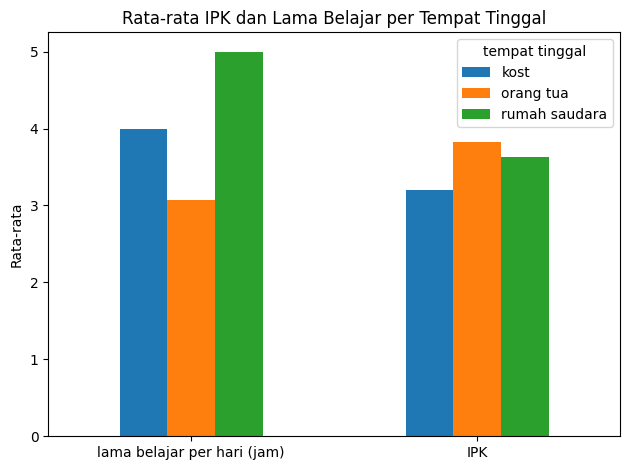

In [ ]:
import matplotlib.pyplot as plt

# Hitung rata-rata IPK dan lama belajar per tempat tinggal
rata_rata = data_manova.groupby('tempat tinggal')[['lama belajar per hari (jam)', 'IPK']].mean()

# Transpose dan buat bar plot
rata_rata.T.plot(kind='bar')

plt.title('Rata-rata IPK dan Lama Belajar per Tempat Tinggal')
plt.ylabel('Rata-rata')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Tinggal bersama orang tua menjadi kelompok tempat tinggal yang paling mencolok dan berpengaruh signifikan terhadap lama belajar per hari (jam) dan IPK. Dengan kata lain, walaupun jam belajar sedikit namun dukungan dan kehadiran orang tua menjadi salah satu faktor yang menentukan prestasi Mahasiswa.